In [101]:
!apt install fonts-nanum

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 52 not upgraded.


In [88]:
# 1. 나이와 직업이 지출 점수에 미치는 영향

# 필요한 라이브러리 임포트
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
import scipy.stats as stats
import matplotlib as mpl # 한글 폰트 설정 (NanumGothic) 
mpl.rcParams['font.family'] = 'NanumGothic'
mpl.rcParams['axes.unicode_minus'] = False


In [89]:
# 데이터셋 로드 (샘플 데이터)
data = pd.DataFrame({
    'ID': [458989, 458994, 458996, 459000],
    'Gender': ['Female', 'Male', 'Female', 'Male'],
    'Ever_Married': ['Yes', 'Yes', 'Yes', 'Yes'],
    'Age': [36, 37, 69, 59],
    'Graduated': ['Yes', 'Yes', 'No', 'No'],
    'Profession': ['Engineer', 'Healthcare', 'None', 'Executive'],
    'Work_Experience': [0.0, 8.0, 0.0, 11.0],
    'Spending_Score': ['Low', 'Average', 'Low', 'High'],
    'Family_Size': [1.0, 4.0, 1.0, 2.0],
    'Var_1': ['Cat_6', 'Cat_6', 'Cat_6', 'Cat_6']
})

In [90]:
# 데이터셋 요약 보기
data.describe()

,ID,Age,Work_Experience,Family_Size
count,4.000000,4.000000,4.000000,4.000000
mean,458994.750000,50.250000,4.750000,2.000000
std,4.573474,16.398679,5.619905,1.414214
min,458989.000000,36.000000,0.000000,1.000000
25%,458992.750000,36.750000,0.000000,1.000000
50%,458995.000000,48.000000,4.000000,1.500000
75%,458997.000000,61.500000,8.750000,2.500000
max,459000.000000,69.000000,11.000000,4.000000


In [91]:
# --- DDA (데이터 탐색 분석) ---
# 1.1 나이대별 평균 지출 점수 분석 (연속형 변수와 범주형 변수 관계)
# Spending_Score을 범주형으로 변환 후 나이대별로 그룹핑
data['Spending_Score'] = data['Spending_Score'].map({'Low': 1, 'Average': 2, 'High': 3})


In [92]:
# 나이대 구분 (20대, 30대, 40대, 50대, 60대 이상)
bins = [0, 29, 39, 49, 59, 100]
labels = ['20대', '30대', '40대', '50대', '60대 이상']
data['Age_Group'] = pd.cut(data['Age'], bins=bins, labels=labels)

In [93]:
# 나이대별 평균 Spending_Score
age_group_spending = data.groupby('Age_Group')['Spending_Score'].mean().reset_index()


In [94]:
# 1.2 직업군별 지출 점수 분석
# 직업군에 따른 Spending_Score 평균 비교
profession_spending = data.groupby('Profession')['Spending_Score'].mean().reset_index()


findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
/root/.local/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51649 (\N{HANGUL SYLLABLE JIG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/root/.local/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50629 (\N{HANGUL SYLLABLE EOB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/root/.local/lib/python3.8/site-packages/IPython/c

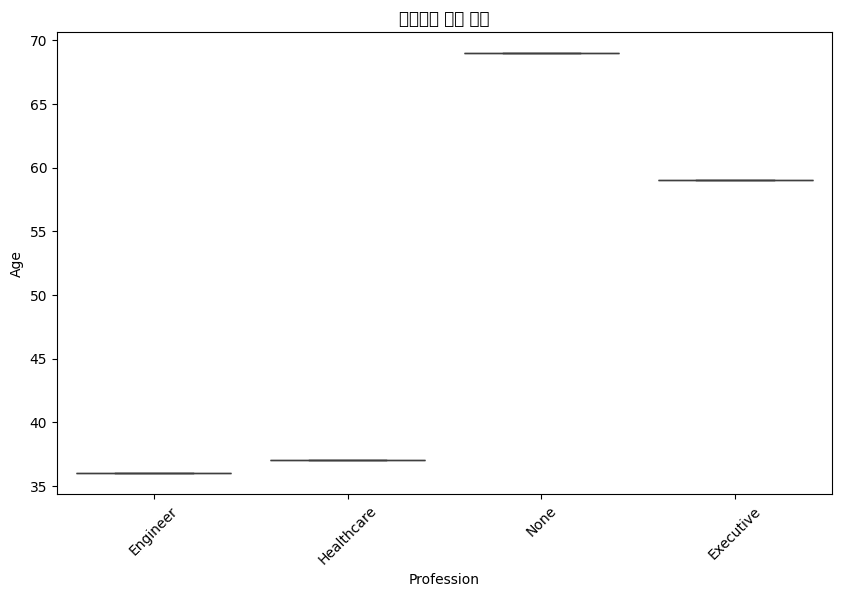

In [95]:
# 1.3 나이와 직업군의 상관 관계 분석
# 나이와 직업군의 관계 시각화
plt.figure(figsize=(10,6))
sns.boxplot(x='Profession', y='Age', data=data)
plt.title('직업군별 나이 분포')
plt.xticks(rotation=45)
plt.show()


findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
/root/.local/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 45208 (\N{HANGUL SYLLABLE NA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/root/.local/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/root/.local/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 45824 (\

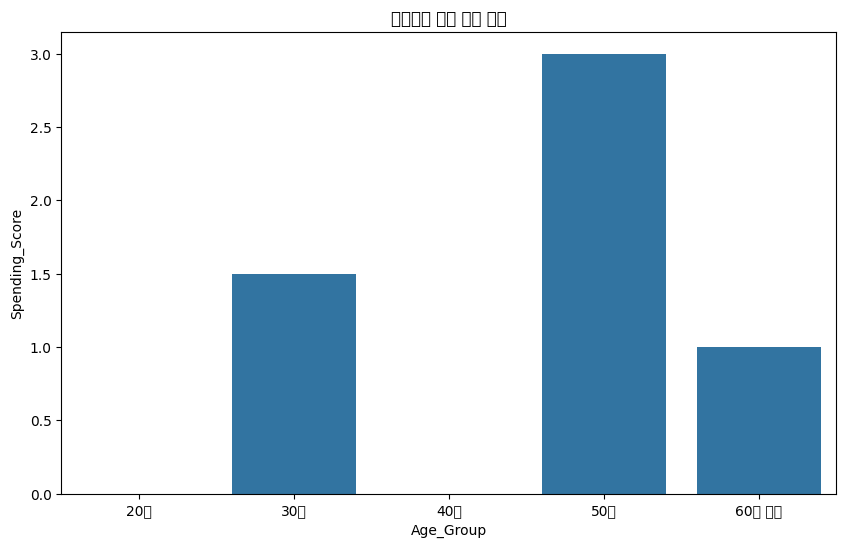

In [96]:
# --- EDA (탐색적 데이터 분석) ---
# 나이대별 지출 점수 시각화
plt.figure(figsize=(10,6))
sns.barplot(x='Age_Group', y='Spending_Score', data=age_group_spending)
plt.title('나이대별 평균 지출 점수')
plt.show()


findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
/root/.local/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51649 (\N{HANGUL SYLLABLE JIG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/root/.local/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50629 (\N{HANGUL SYLLABLE EOB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/root/.local/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44400

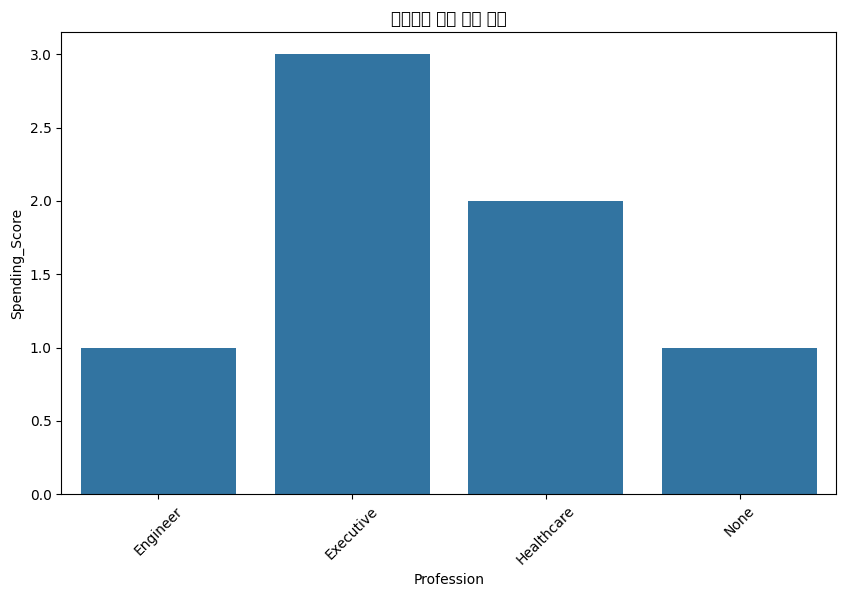

In [97]:
# 직업군별 지출 점수 시각화
plt.figure(figsize=(10,6))
sns.barplot(x='Profession', y='Spending_Score', data=profession_spending)
plt.title('직업군별 평균 지출 점수')
plt.xticks(rotation=45)
plt.show()


findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
/usr/local/lib/python3.8/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  fig.canvas.draw()
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
/usr/local/lib/python3.8/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.8/dis

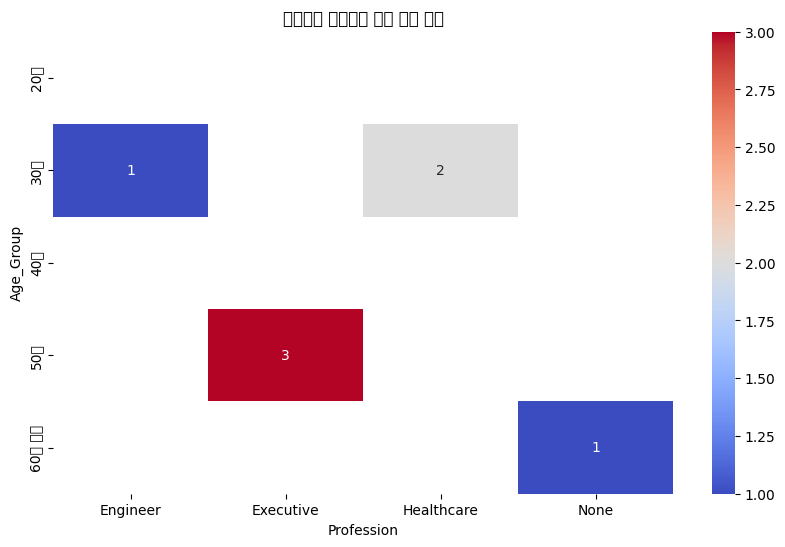

In [98]:
# 나이대별 직업군의 관계 시각화
plt.figure(figsize=(10,6))
sns.heatmap(data.groupby(['Age_Group', 'Profession'])['Spending_Score'].mean().unstack(), annot=True, cmap='coolwarm')
plt.title('나이대별 직업군의 평균 지출 점수')
plt.show()


findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
/root/.local/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 45208 (\N{HANGUL SYLLABLE NA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/root/.local/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/root/

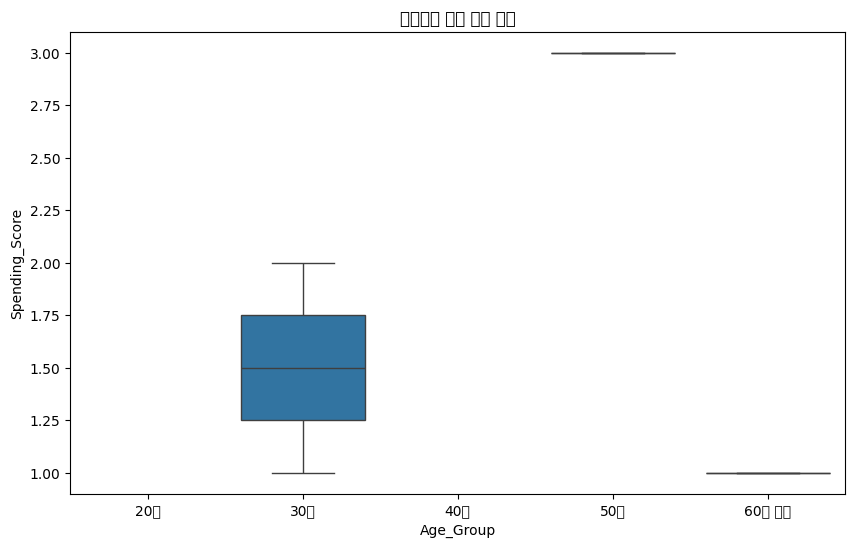

In [99]:
# 나이대와 직업군 간의 관계 시각화
plt.figure(figsize=(10,6))
sns.boxplot(x='Age_Group', y='Spending_Score', data=data)
plt.title('나이대별 지출 점수 분포')
plt.show()